In [ ]:
#hide
import sys
sys.path.append('..')
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fastseq

> A way to use fastai with sequence data

## Installing

Please install [fastai](https://dev.fast.ai/#Installing) according to the instructions.

Then install Fastseq by:
```
pip install -e .
```

## How to use

In [ ]:
from fastai.basics import *
from fastseq.all import *
from fastseq.nbeats.model import *
from fastseq.nbeats.learner import *
horizon, lookback = 7, 35    

In [ ]:
import time
time.sleep(60*60)

Getting the data fastai style:

In [ ]:
path = untar_data(URLs.m4_daily)
data = TSDataLoaders.from_folder(path, horizon = horizon, lookback = lookback, nrows = 300, step=3, max_std=5)

torch.Size([1, 1020])
Train:70707; Valid: 1200; Test 300


In [ ]:
items = dummy_data_generator(60, 10, nrows=300)
data = TSDataLoaders.from_items(items,horizon = horizon, lookback = lookback, step=5, valid_pct=.2)

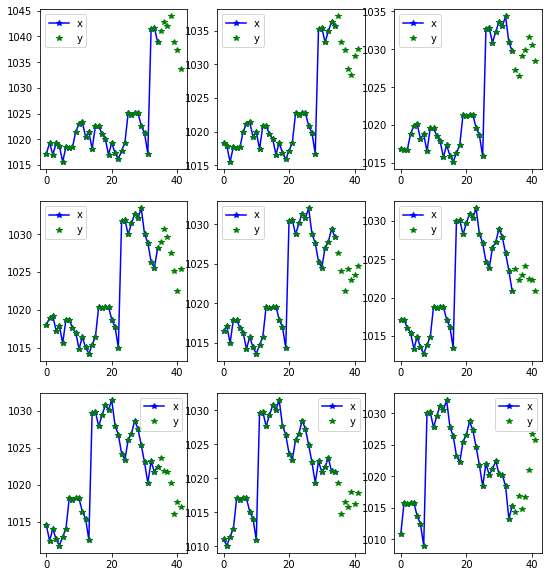

In [ ]:
data.show_batch()

In [ ]:
from fastseq.nbeats.callbacks import *
learn = nbeats_learner(data, cbs=ClipLoss(20), opt_func=ranger, layers= [2048, 2048] )   

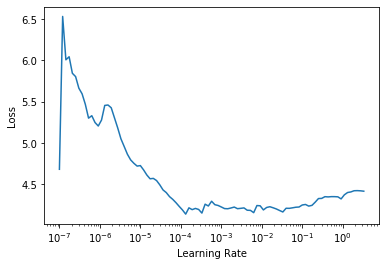

In [ ]:
from fastai.callback.all import *
learn.lr_find()

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,time
0,2.986800,4.166024,2678572.000000,1.148464,3.207243,nan,nan,01:05
1,2.992607,3.997154,2678571.750000,1.111473,3.521520,nan,nan,01:07
2,3.025169,4.087220,2678572.000000,1.176316,3.460181,nan,nan,01:07
3,2.989429,3.963205,2678571.750000,1.171955,3.721218,nan,nan,01:07
4,2.905412,3.953821,2678571.750000,1.162483,3.659148,nan,nan,01:08
5,2.858542,3.912467,2678571.750000,1.103214,3.839308,nan,nan,01:08
6,2.851083,3.951844,2678571.750000,1.164513,3.906400,nan,nan,01:08
7,3.070841,4.082213,2678572.000000,1.226143,3.827291,nan,nan,01:06
8,2.926173,3.930207,2678571.750000,1.119013,3.861898,nan,nan,01:08
9,3.043441,4.078812,2678572.000000,1.180823,3.863375,nan,nan,01:09


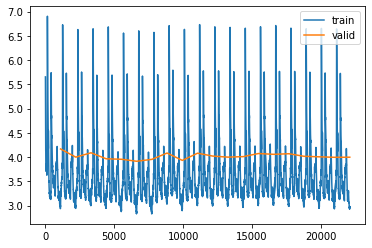

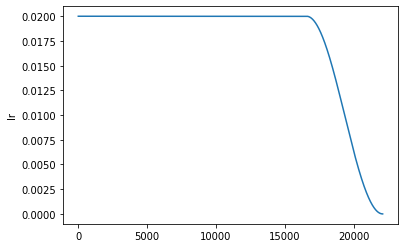

In [ ]:
learn.fit_flat_cos(20, 2e-2)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

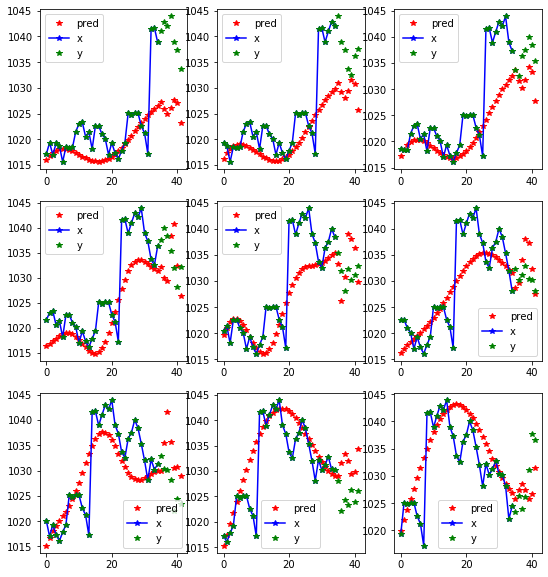

In [ ]:
learn.show_results(0)

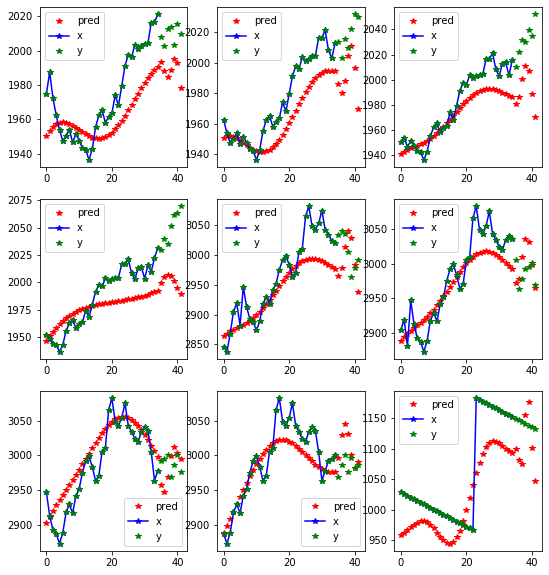

In [ ]:
learn.show_results(1)

epoch,train_loss,valid_loss,mae,smape,theta,b_loss,f_loss,time
0,2.963049,3.992391,2678572.000000,1.203714,3.810500,nan,nan,01:07
1,2.960238,3.992073,2678572.000000,1.205493,3.814572,nan,nan,01:07
2,2.958987,3.989458,2678572.000000,1.206364,3.810439,nan,nan,01:07
3,2.956671,3.987176,2678572.000000,1.207010,3.808650,nan,nan,01:08
4,2.956445,3.987346,2678572.000000,1.207086,3.808126,nan,nan,01:08


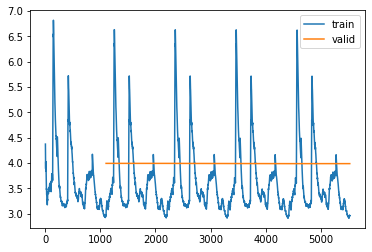

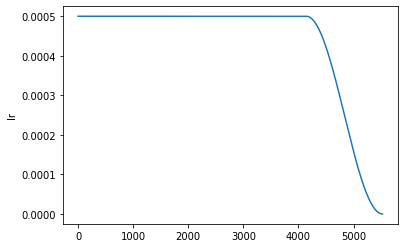

In [ ]:
learn.fit_flat_cos(5,5e-4)
learn.recorder.plot_loss()
learn.recorder.plot_sched()

## Interperation

In [ ]:
learn.n_beats_attention.means()

,trend0_0,trend0_1,seasonality1_0,seasonality1_1,seasonality1_2,seasonality1_3
theta_0_mean,-0.033327233,-0.02480161,2.0,2.0,-2.0,-2.0
theta_0_std,0.19928432,0.20035903,0.0,0.0,0.0,0.0
theta_1_mean,-0.0033333336,-0.019999994,-0.16666667,0.0,-0.41666666,0.5625
theta_1_std,0.019928953,0.0,0.99644756,0.0,0.49822378,0.50132805
theta_2_mean,0.001999999,0.001999999,-2.0,0.0,-0.15952297,0.11597363
theta_2_std,0.0,0.0,0.0,0.0,0.4624862,0.37496567
att_mean,1,1,1,0.25,0.670857,0.444429
att_std,0,0,0,0.433013,0.469819,0.496875
theta_3_mean,NaN,0.00020000001,NaN,0.0,2.0,0.0
theta_3_std,NaN,0.0,NaN,0.0,0.0,0.0


In [ ]:
# hide
from fastai.interpret import *
from fastseq.nbeats.interpret import *

In [ ]:
# hide
interp = NBeatsInterpretation.from_learner(learn)

RuntimeError: The size of tensor a (35) must match the size of tensor b (0) at non-singleton dimension 2

In [ ]:
# hide
interp.plot_top_losses(3, combine_stack=True)